In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [27]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for i_episode in range(num_episodes):
        episode = [] # (state, action, reward)
        state = env.reset()
        
        for t in range(100):                        
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)            
            next_state, reward, done, _ = env.step(action)
            
            episode.append((state, action, reward))                            
            
            if done:
                break
            
            state = next_state
        
        # after episode is done
        # calculate the rewards, V(s), for each state first-visited                
        states_first_visited = set([tuple(x[0]) for x in episode])
        
        for s in states_first_visited:            
            first_visit_idx = next(i for i, x in enumerate(episode) if x[0]==s)            
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_visit_idx:])])        
            returns_sum[s] += G
            returns_count[s] += 1.0            
            V[s] = returns_sum[s] / returns_count[s]
            
    return V    

In [28]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation    
    return np.array([0.7, 0.3]) if score >= 15 else np.array([0.3, 0.7])


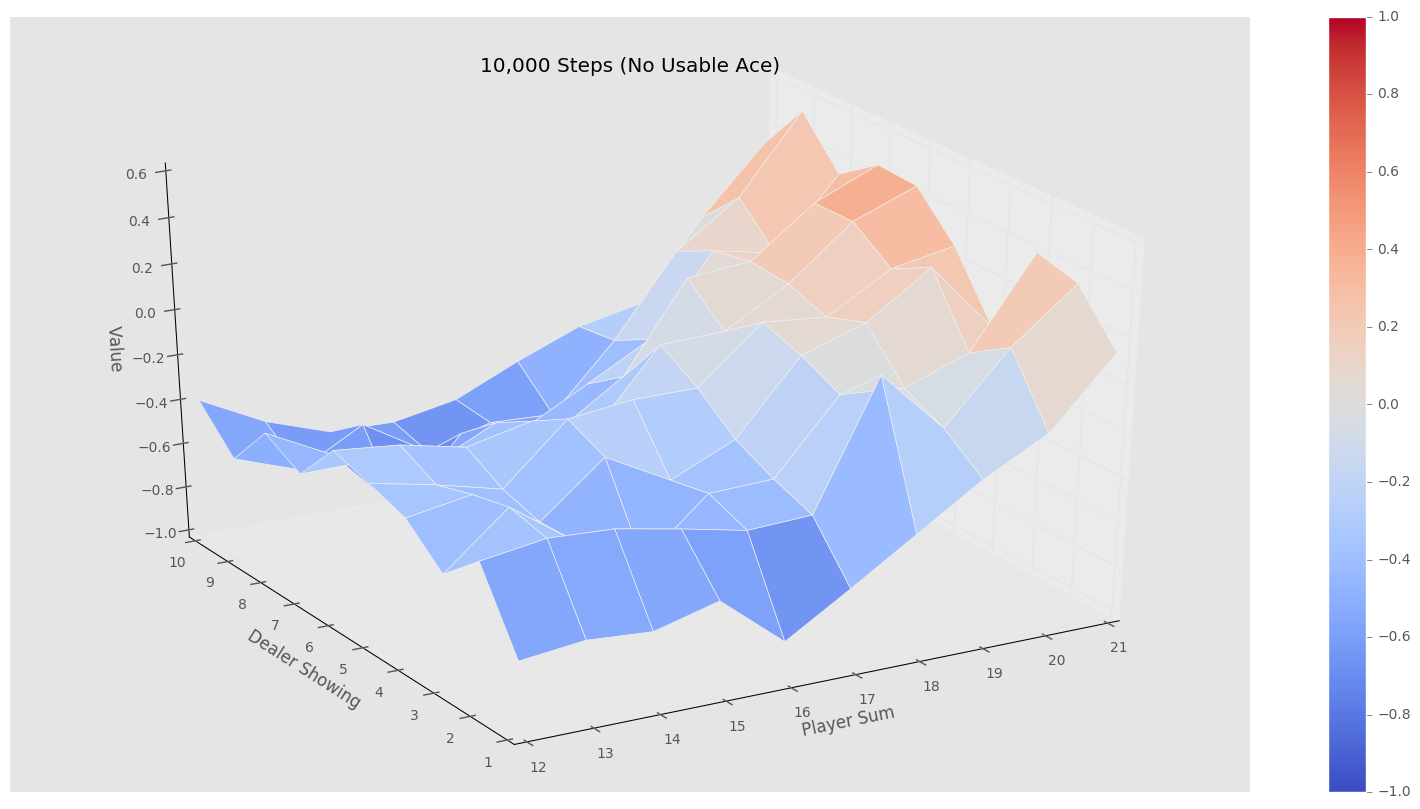

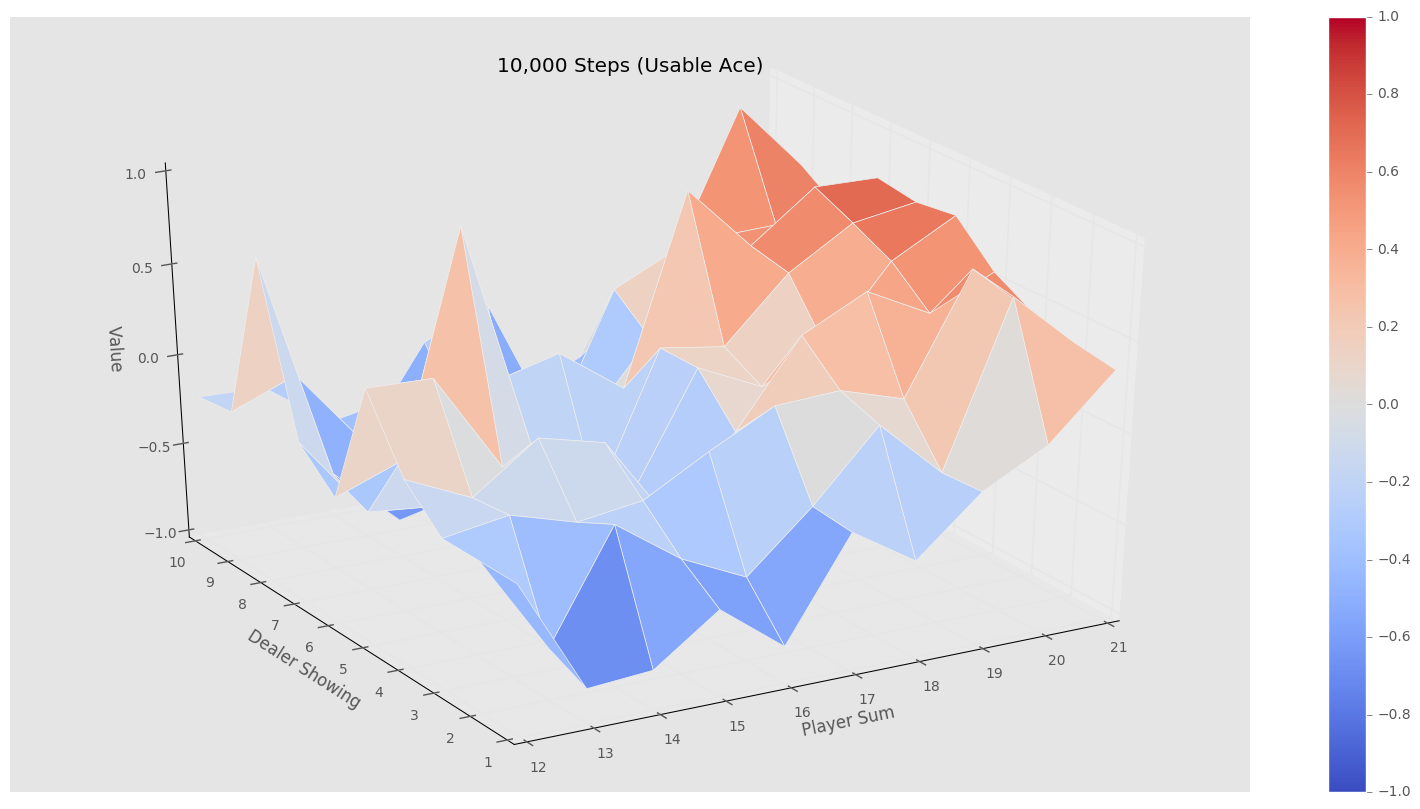

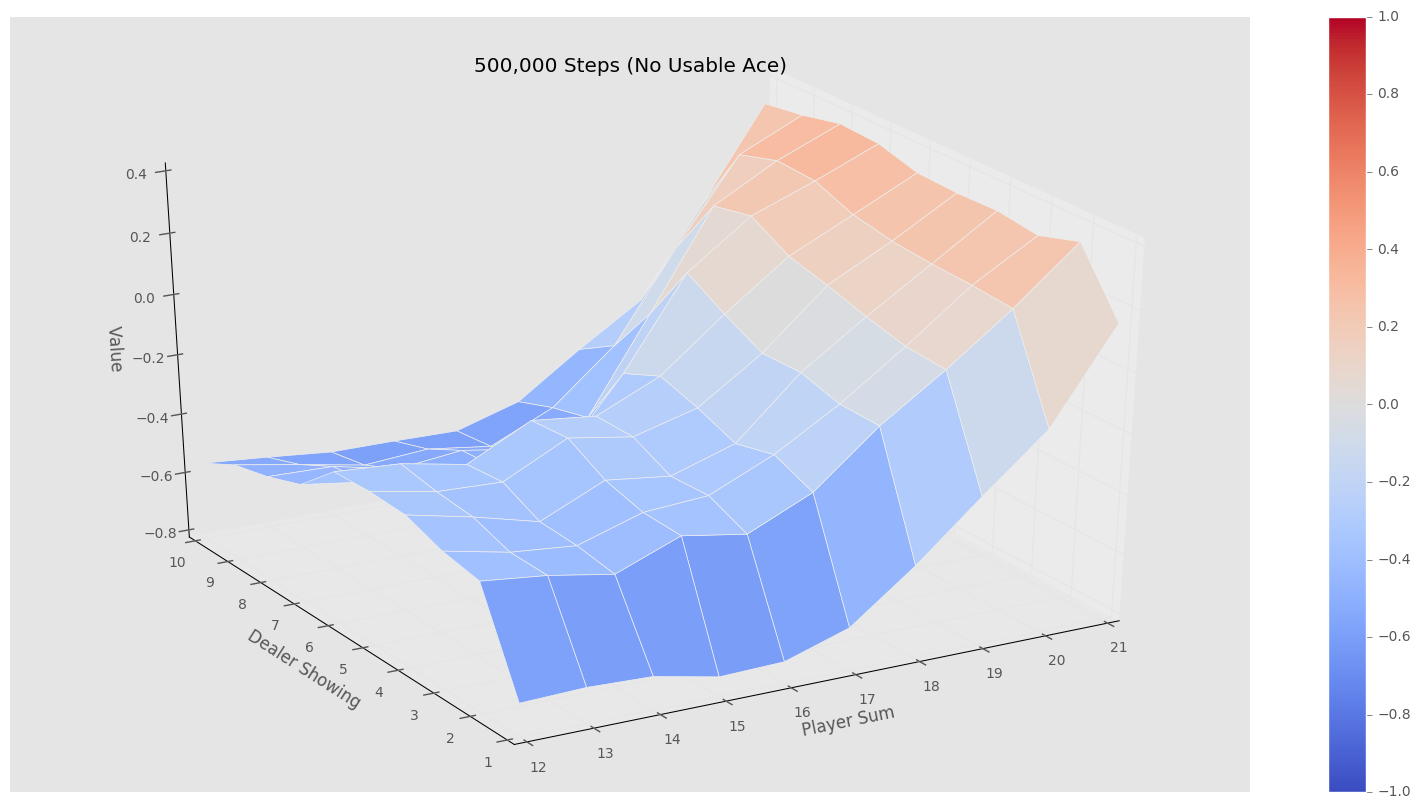

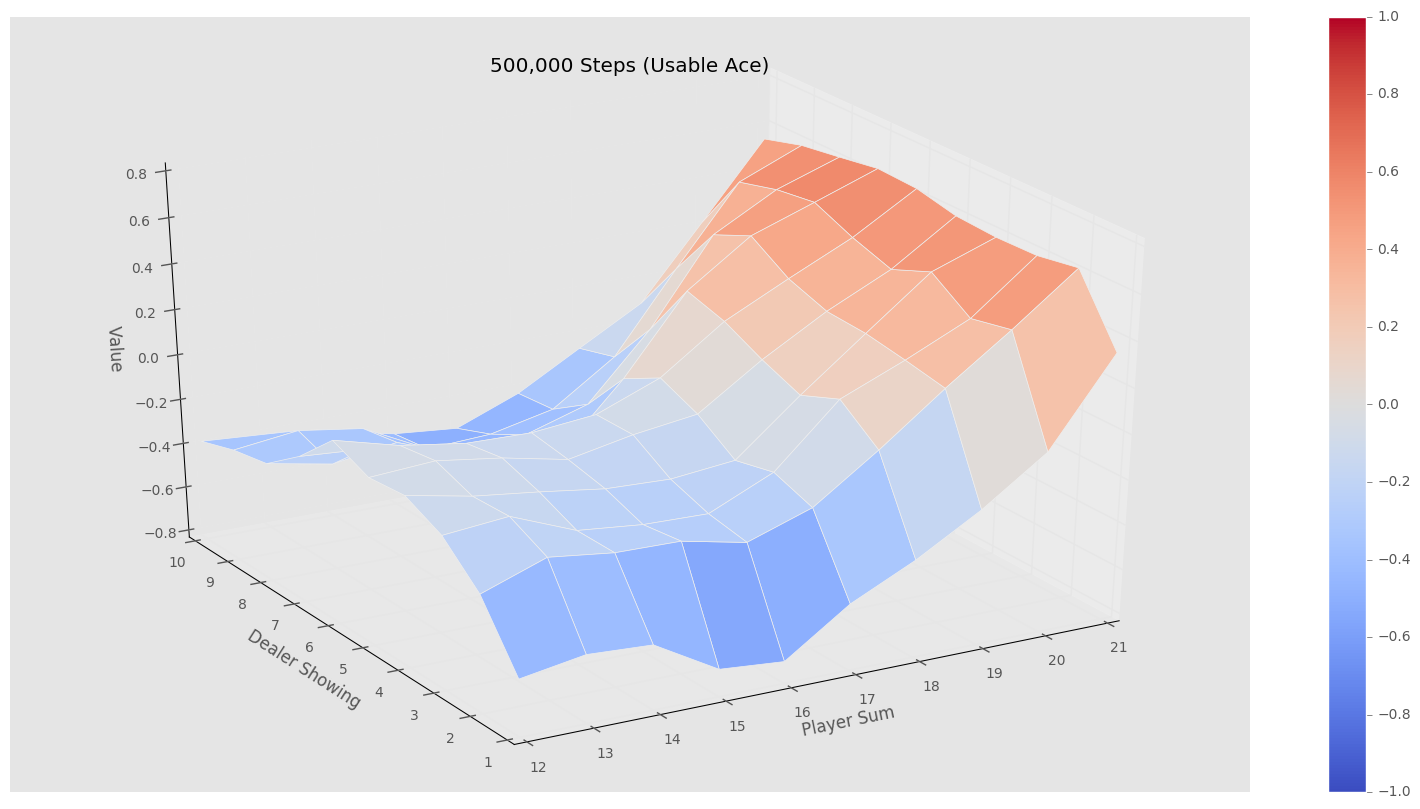

In [29]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")